In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Data Cleaning and Preparation

In [2]:
df=pd.read_csv('/content/Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
df.isnull().sum()


,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [5]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [6]:
df = df.fillna(df.median(numeric_only=True))

In [7]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [8]:
df.dtypes
### there is no inconsistencies in data types

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


<Axes: >

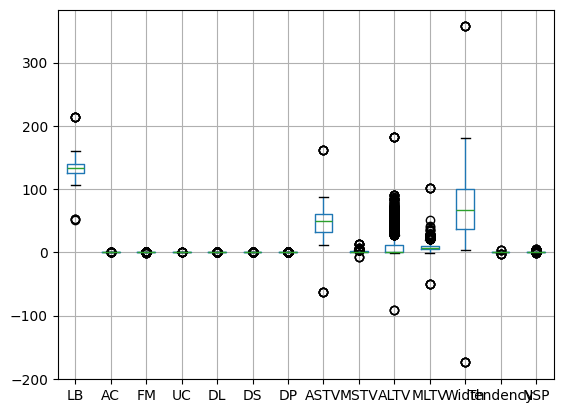

In [9]:
df.boxplot()


In [10]:
### outlier capping
def outlier_capping(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)
  iqr= q3-q1
  lower_extreme= q1-1.5*iqr
  upper_extreme= q3+1.5*iqr
  df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
  outlier_capping(df,col)


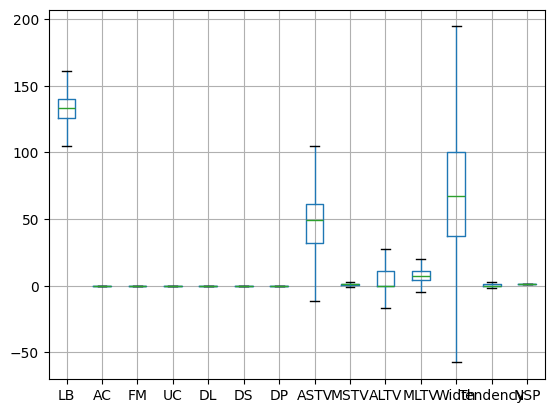

In [11]:
df.boxplot()
plt.show()

Statistical Summary

In [12]:
summary = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Std Dev': df.std(),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})

In [13]:
summary

,Mean,Median,Std Dev,IQR
LB,133.290331,133.000000,9.930268,14.000000
AC,0.003132,0.001634,0.003828,0.005606
FM,0.001568,0.000000,0.002485,0.002567
UC,0.004362,0.004484,0.003001,0.004685
DL,0.001770,0.000000,0.002668,0.003289
DS,0.000000,0.000000,0.000000,0.000000
DP,0.000000,0.000000,0.000000,0.000000
ASTV,46.981873,49.000000,17.612745,29.000000
MSTV,1.304644,1.200000,0.781091,1.000000
ALTV,6.691678,0.000000,10.378400,11.000000


Data Visualization


In [15]:
df.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


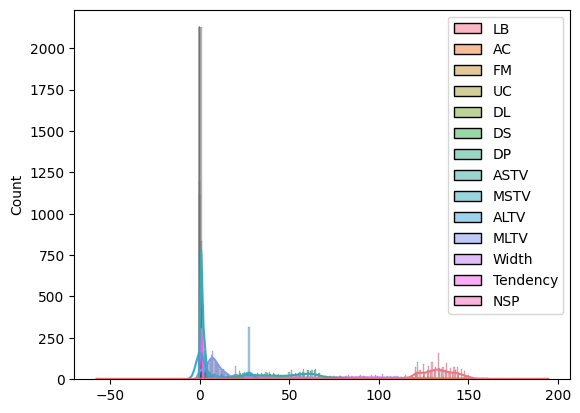

In [38]:
sns.histplot(data=df,kde=True)
plt.show()

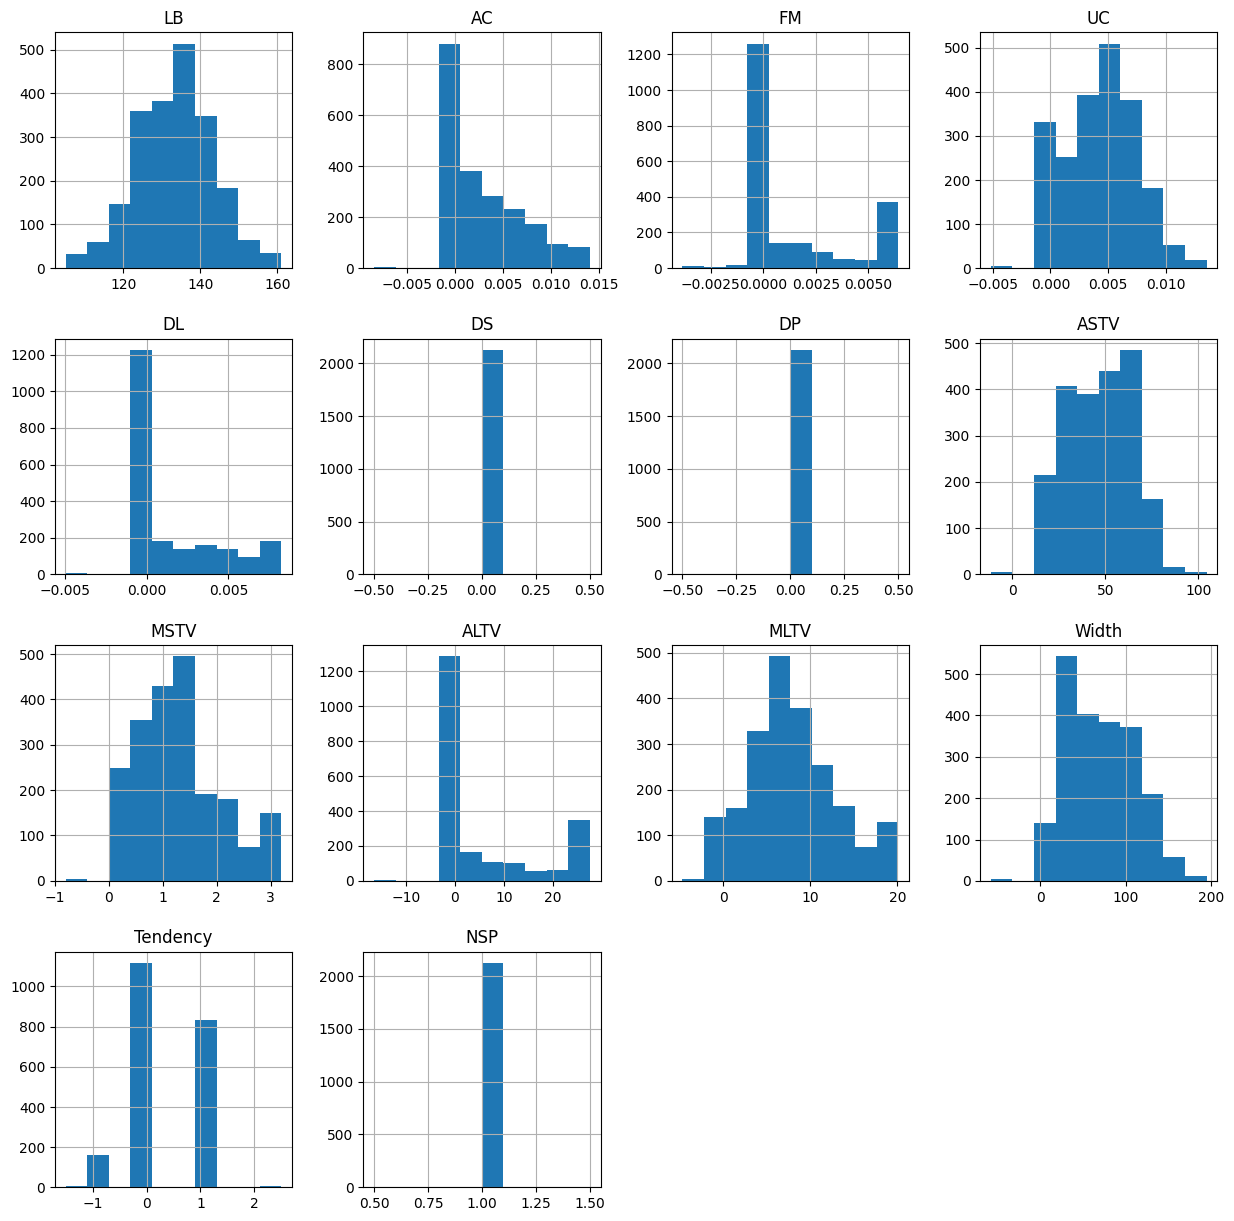

In [39]:
df.hist(figsize=(15,15))
plt.show()

In [24]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", cat_cols)
### there is no categorical variables

Categorical columns: Index([], dtype='object')


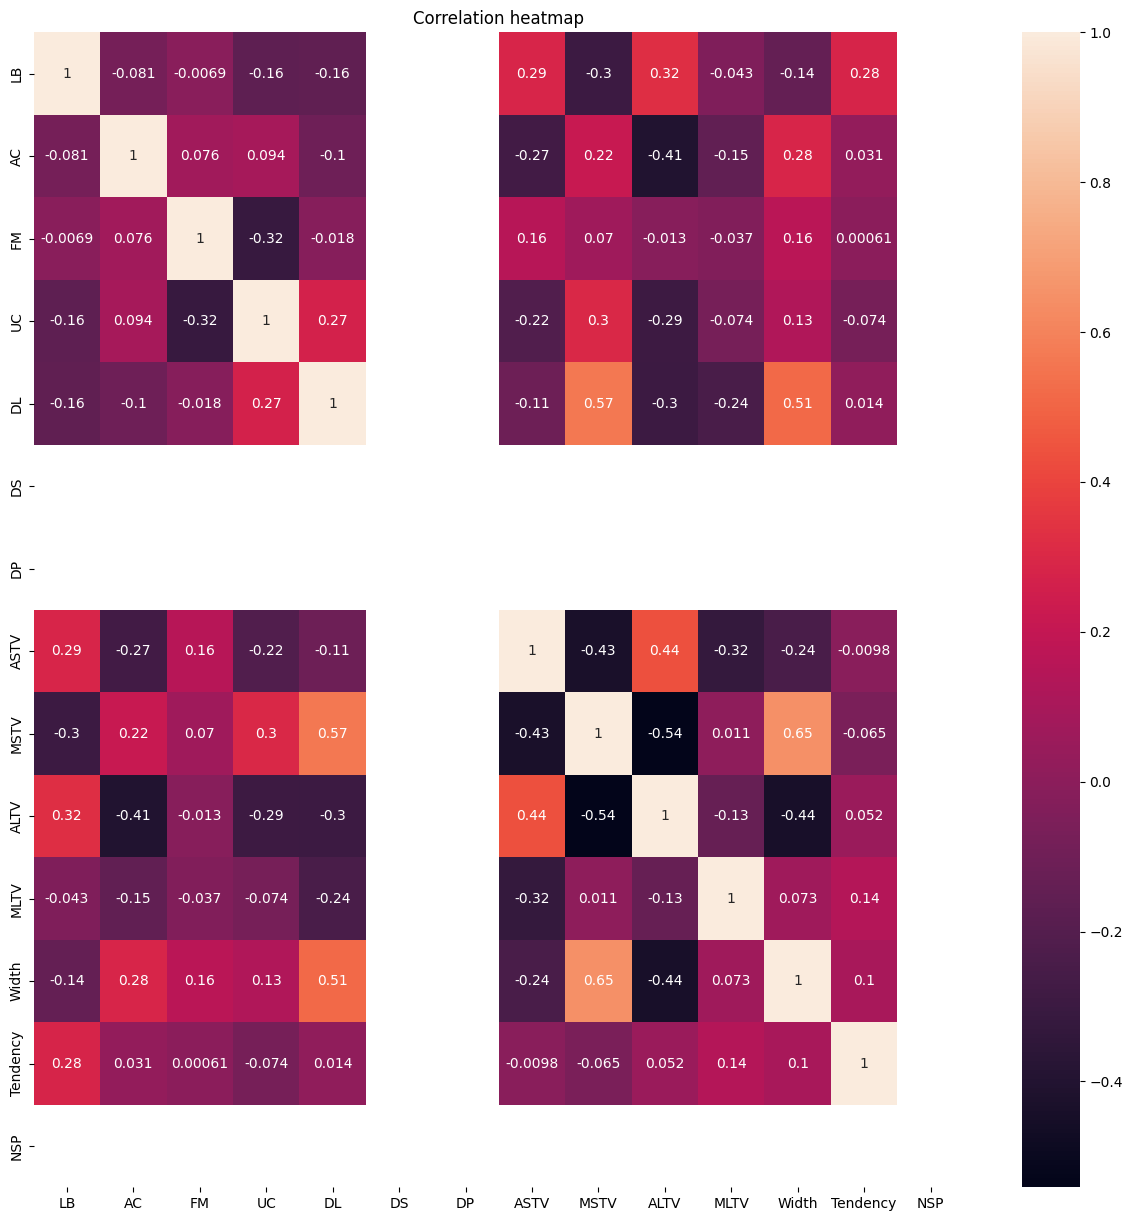

In [32]:
plt.figure(figsize=(15,15))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation heatmap')
plt.show()

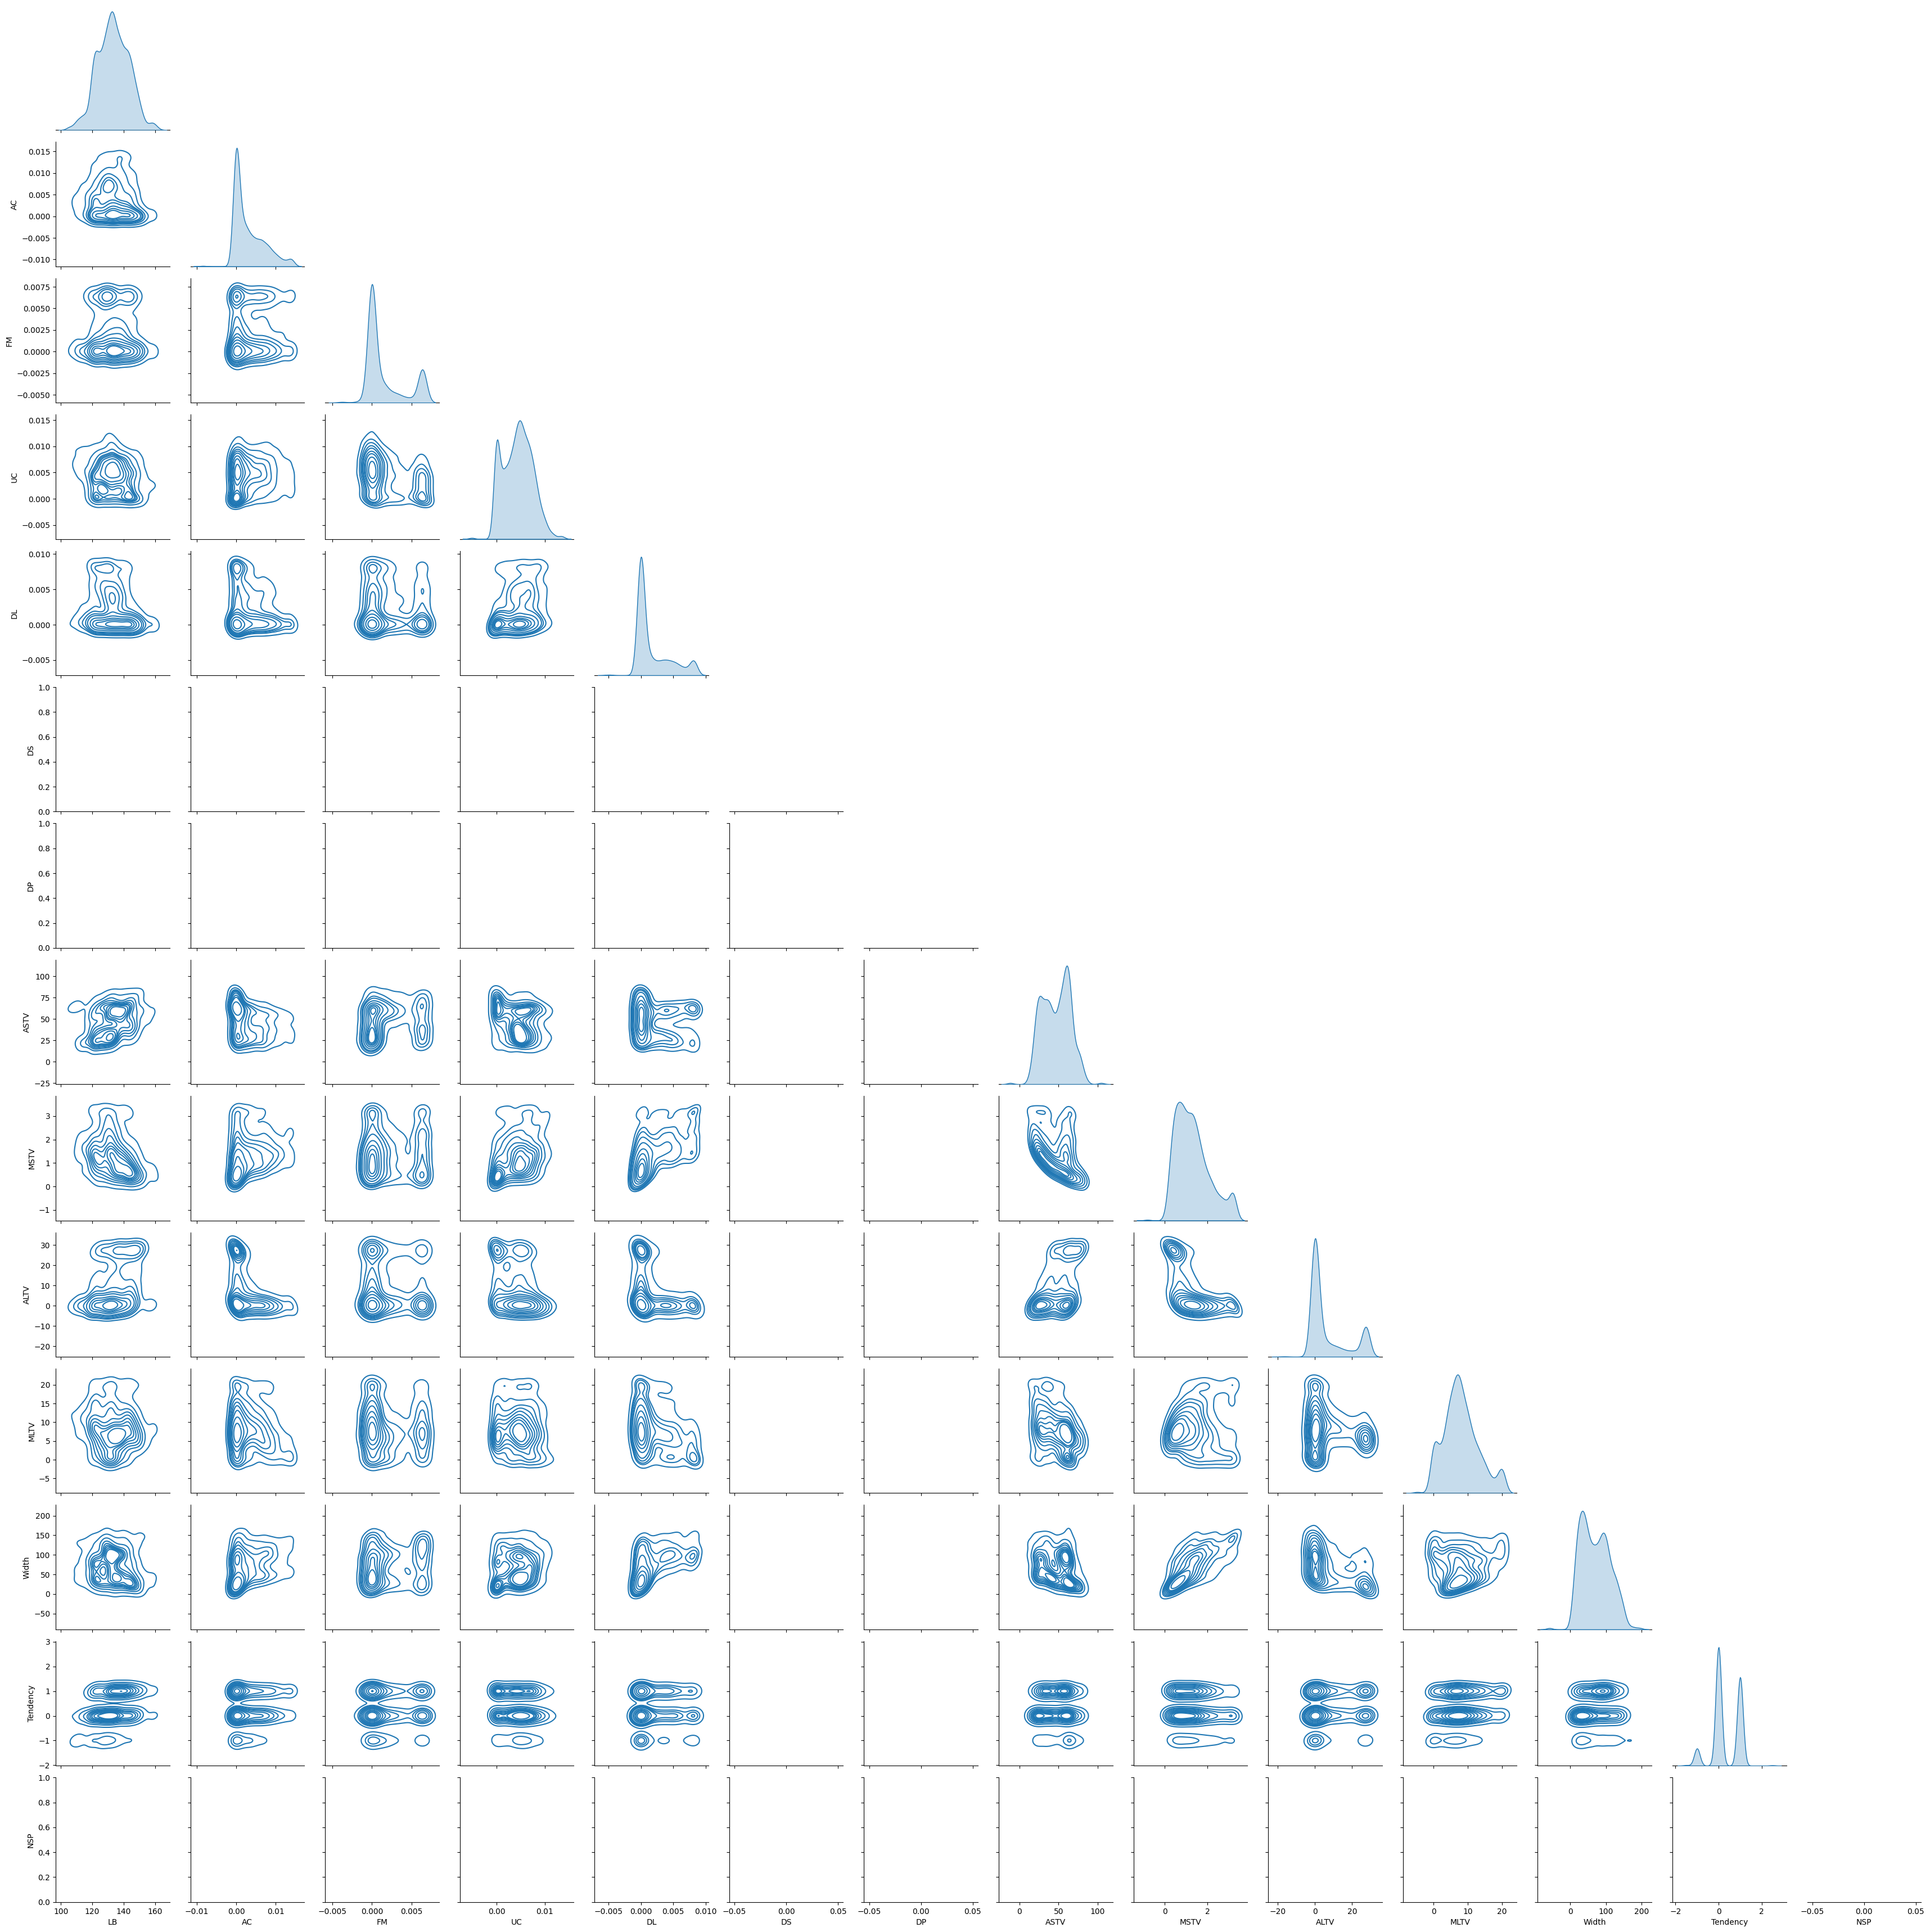

In [34]:
sns.pairplot(df,kind='kde',corner=True)
plt.show()

Pattern Recognition and Insights:

In [40]:
corr_df=df.corr().abs().unstack().sort_values(ascending=False)
corr_df= corr_df[corr_df !=1].drop_duplicates()
corr_df.head(10)

,,0
MSTV,Width,0.645744
DL,MSTV,0.566340
ALTV,MSTV,0.541156
Width,DL,0.514538
ASTV,ALTV,0.439040
ALTV,Width,0.438860
MSTV,ASTV,0.433844
AC,ALTV,0.408012
MLTV,ASTV,0.324702
ALTV,LB,0.322431


In [41]:
corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.080759,-0.006929,-0.162811,-0.156260,NaN,NaN,0.285623,-0.295600,0.322431,-0.042578,-0.140015,0.280796,NaN
AC,-0.080759,1.000000,0.075669,0.093614,-0.103048,NaN,NaN,-0.272452,0.216377,-0.408012,-0.152012,0.283749,0.030557,NaN
FM,-0.006929,0.075669,1.000000,-0.317265,-0.017610,NaN,NaN,0.156351,0.070300,-0.013420,-0.037001,0.164579,0.000606,NaN
UC,-0.162811,0.093614,-0.317265,1.000000,0.268605,NaN,NaN,-0.215984,0.297843,-0.293340,-0.074192,0.131701,-0.074168,NaN
DL,-0.156260,-0.103048,-0.017610,0.268605,1.000000,NaN,NaN,-0.111624,0.566340,-0.295886,-0.242728,0.514538,0.014407,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.285623,-0.272452,0.156351,-0.215984,-0.111624,NaN,NaN,1.000000,-0.433844,0.439040,-0.324702,-0.241119,-0.009754,NaN
MSTV,-0.295600,0.216377,0.070300,0.297843,0.566340,NaN,NaN,-0.433844,1.000000,-0.541156,0.011105,0.645744,-0.064733,NaN
ALTV,0.322431,-0.408012,-0.013420,-0.293340,-0.295886,NaN,NaN,0.439040,-0.541156,1.000000,-0.133070,-0.438860,0.052496,NaN


**Conclusion**

In summary, the exploratory analysis provided a clear understanding of the dataset’s structure and revealed meaningful patterns that align with clinical insights. These findings can guide both data-driven model development and decision-making processes in fetal health monitoring.